In [1]:
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SQLContext
sqlc = SQLContext(sc)
# It runs just once, Running it again throws an error

In [2]:
from pyspark.sql import *
na_schema = Row("Name","Age")

In [3]:
row1 = na_schema("Ankit", 23)
row2 = na_schema("Tyler", 26)
row3 = na_schema("Preity", 36)

In [4]:
na_list = [row1, row2, row3]
df_na = sqlc.createDataFrame(na_list)
type(df_na)

pyspark.sql.dataframe.DataFrame

In [5]:
df_na.show()
#it worked previously

+------+---+
|  Name|Age|
+------+---+
| Ankit| 23|
| Tyler| 26|
|Preity| 36|
+------+---+



Exercise 2


In [6]:
data = [("Ankit",23),("Tyler",26),("Preity",36)]
data_rdd = sc.parallelize(data)
type(data_rdd)

pyspark.rdd.RDD

In [7]:
data_sd = sqlc.createDataFrame(data_rdd)

In [8]:
data_sd.show()

+------+---+
|    _1| _2|
+------+---+
| Ankit| 23|
| Tyler| 26|
|Preity| 36|
+------+---+



Exercise 3
install this package
pyspark –packages com.databricks:spark-csv_2.10:1.4.0


In [12]:
df = sqlc.read.csv('file:///D:/Big-Data-Science/Big-Data-Analysis-with-Python-master/Lesson04/iris.csv', header=True)
type(df)

pyspark.sql.dataframe.DataFrame

In [13]:
df.show(4)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|          3|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 4 rows



Exercise 4


In [17]:
import pandas as pd
df.toPandas()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3,5.2,2.3,virginica
146,6.3,2.5,5,1.9,virginica
147,6.5,3,5.2,2,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
df.toPandas().to_csv('iris1.csv')

Exercise 5

In [19]:
df.printSchema()

root
 |-- sepal_length: string (nullable = true)
 |-- sepal_width: string (nullable = true)
 |-- petal_length: string (nullable = true)
 |-- petal_width: string (nullable = true)
 |-- species: string (nullable = true)



In [20]:
df.schema.names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [21]:
## Counting the number of rows in DataFrame
df.count()

150

In [22]:
## Counting the number of columns in DataFrame
len(df.columns)

5

In [23]:
df.show(4)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|          3|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 4 rows



In [24]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  species|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|     null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|     null|
|    min|               4.3|                  2|                 1|               0.1|   setosa|
|    max|               7.9|                4.4|               6.9|               2.5|virginica|
+-------+------------------+-------------------+------------------+------------------+---------+



In [25]:
df.describe('sepal_width').show()

+-------+-------------------+
|summary|        sepal_width|
+-------+-------------------+
|  count|                150|
|   mean| 3.0540000000000007|
| stddev|0.43359431136217375|
|    min|                  2|
|    max|                4.4|
+-------+-------------------+



Exercise 6

In [58]:
df1 = df.withColumnRenamed('sepal_length','sepallength')
df1.show(4)

+-----------+-----------+------------+-----------+-------+
|sepallength|sepal_width|petal_length|petal_width|species|
+-----------+-----------+------------+-----------+-------+
|        5.1|        3.5|         1.4|        0.2| setosa|
|        4.9|        3.0|         1.4|        0.2| setosa|
|        4.7|        3.2|         1.3|        0.2| setosa|
|        4.6|        3.1|         1.5|        0.2| setosa|
+-----------+-----------+------------+-----------+-------+
only showing top 4 rows



In [59]:
df1 = (df
         .withColumnRenamed('sepal_width','sepalwidth')
         .withColumnRenamed('petal_length','petallength')
         .withColumnRenamed('petal_width','petalwidth'))
df1.show(4)

+------------+----------+-----------+----------+-------+
|sepal_length|sepalwidth|petallength|petalwidth|species|
+------------+----------+-----------+----------+-------+
|         5.1|       3.5|        1.4|       0.2| setosa|
|         4.9|       3.0|        1.4|       0.2| setosa|
|         4.7|       3.2|        1.3|       0.2| setosa|
|         4.6|       3.1|        1.5|       0.2| setosa|
+------------+----------+-----------+----------+-------+
only showing top 4 rows



In [61]:
df2 = df.toDF('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species')
df2.show(4)

+-----------+----------+-----------+----------+-------+
|sepallength|sepalwidth|petallength|petalwidth|species|
+-----------+----------+-----------+----------+-------+
|        5.1|       3.5|        1.4|       0.2| setosa|
|        4.9|       3.0|        1.4|       0.2| setosa|
|        4.7|       3.2|        1.3|       0.2| setosa|
|        4.6|       3.1|        1.5|       0.2| setosa|
+-----------+----------+-----------+----------+-------+
only showing top 4 rows



In [62]:
df2.select('sepalwidth','sepallength').show(4)

+----------+-----------+
|sepalwidth|sepallength|
+----------+-----------+
|       3.5|        5.1|
|       3.0|        4.9|
|       3.2|        4.7|
|       3.1|        4.6|
+----------+-----------+
only showing top 4 rows



Exercise 7

In [63]:
df2 = df2.withColumn('half_sepal_width', df2['sepalwidth']/2.0)
df2.show(4)

+-----------+----------+-----------+----------+-------+----------------+
|sepallength|sepalwidth|petallength|petalwidth|species|half_sepal_width|
+-----------+----------+-----------+----------+-------+----------------+
|        5.1|       3.5|        1.4|       0.2| setosa|            1.75|
|        4.9|       3.0|        1.4|       0.2| setosa|             1.5|
|        4.7|       3.2|        1.3|       0.2| setosa|             1.6|
|        4.6|       3.1|        1.5|       0.2| setosa|            1.55|
+-----------+----------+-----------+----------+-------+----------------+
only showing top 4 rows



In [64]:
df2 = df2.drop('half_sepal_width')
df2.show(4)

+-----------+----------+-----------+----------+-------+
|sepallength|sepalwidth|petallength|petalwidth|species|
+-----------+----------+-----------+----------+-------+
|        5.1|       3.5|        1.4|       0.2| setosa|
|        4.9|       3.0|        1.4|       0.2| setosa|
|        4.7|       3.2|        1.3|       0.2| setosa|
|        4.6|       3.1|        1.5|       0.2| setosa|
+-----------+----------+-----------+----------+-------+
only showing top 4 rows



Exercise 8


In [65]:
df.select('species').distinct().show()

+----------+
|   species|
+----------+
| virginica|
|versicolor|
|    setosa|
+----------+



In [66]:
df.select('Species').distinct().count()

3

Exercise 9


In [67]:
df2.select('species').dropDuplicates().show()

+----------+
|   species|
+----------+
| virginica|
|versicolor|
|    setosa|
+----------+



In [68]:
## Filtering using a single condition
df2.filter(df2.species == 'setosa').show(4)

+-----------+----------+-----------+----------+-------+
|sepallength|sepalwidth|petallength|petalwidth|species|
+-----------+----------+-----------+----------+-------+
|        5.1|       3.5|        1.4|       0.2| setosa|
|        4.9|       3.0|        1.4|       0.2| setosa|
|        4.7|       3.2|        1.3|       0.2| setosa|
|        4.6|       3.1|        1.5|       0.2| setosa|
+-----------+----------+-----------+----------+-------+
only showing top 4 rows



In [69]:
df2.filter((df2.sepallength > 5) & (df2.species == 'setosa')).show(4)

+-----------+----------+-----------+----------+-------+
|sepallength|sepalwidth|petallength|petalwidth|species|
+-----------+----------+-----------+----------+-------+
|        5.1|       3.5|        1.4|       0.2| setosa|
|        5.4|       3.9|        1.7|       0.4| setosa|
|        5.4|       3.7|        1.5|       0.2| setosa|
|        5.8|       4.0|        1.2|       0.2| setosa|
+-----------+----------+-----------+----------+-------+
only showing top 4 rows



Exercise 10

In [70]:
df2.orderBy(df2.sepallength).show(5)

+-----------+----------+-----------+----------+-------+
|sepallength|sepalwidth|petallength|petalwidth|species|
+-----------+----------+-----------+----------+-------+
|        4.3|       3.0|        1.1|       0.1| setosa|
|        4.4|       3.2|        1.3|       0.2| setosa|
|        4.4|       3.0|        1.3|       0.2| setosa|
|        4.4|       2.9|        1.4|       0.2| setosa|
|        4.5|       2.3|        1.3|       0.3| setosa|
+-----------+----------+-----------+----------+-------+
only showing top 5 rows



In [72]:
df2.orderBy(df2.sepallength.desc()).show(5)

+-----------+----------+-----------+----------+---------+
|sepallength|sepalwidth|petallength|petalwidth|  species|
+-----------+----------+-----------+----------+---------+
|        7.9|       3.8|        6.4|       2.0|virginica|
|        7.7|       2.6|        6.9|       2.3|virginica|
|        7.7|       3.8|        6.7|       2.2|virginica|
|        7.7|       3.0|        6.1|       2.3|virginica|
|        7.7|       2.8|        6.7|       2.0|virginica|
+-----------+----------+-----------+----------+---------+
only showing top 5 rows



Exercise 11

In [73]:
df2.groupby('species').agg({'sepalwidth' : 'mean'}).show()

+----------+------------------+
|   species|   avg(sepalwidth)|
+----------+------------------+
| virginica|2.9739999999999998|
|versicolor|2.7700000000000005|
|    setosa|3.4180000000000006|
+----------+------------------+



In [75]:
df2.groupby('species').count().show()

+----------+-----+
|   species|count|
+----------+-----+
| virginica|   50|
|versicolor|   50|
|    setosa|   50|
+----------+-----+



Exercise 12

In [76]:
data = df.groupby('species').count().toPandas()

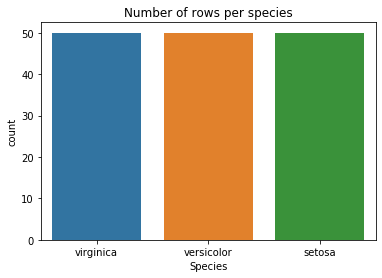

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot( x = data['species'], y = data['count'])
plt.xlabel('Species')
plt.ylabel('count')
plt.title('Number of rows per species')
plt.show()

Exercise 13

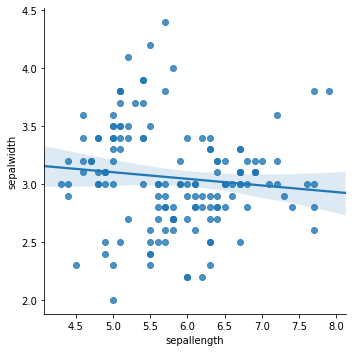

In [79]:
data = df2.toPandas()
sns.lmplot(x = "sepallength", y = "sepalwidth", data = data)
plt.show()

Exercise 14

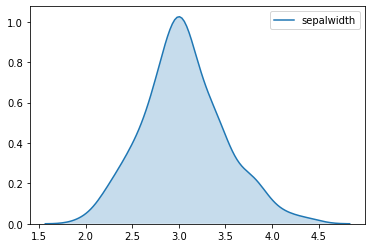

In [80]:
import seaborn as sns
data = df2.toPandas()
sns.kdeplot(data.sepalwidth, shade = True)
plt.show()

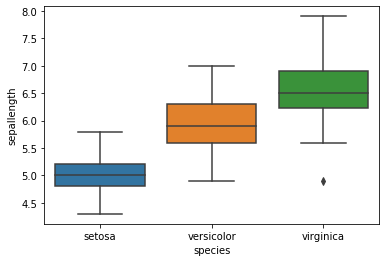

In [83]:
sns.boxplot(x = "species", y = "sepallength", data = data)
plt.show()